## Simulação de interoperablidade do sistema atual

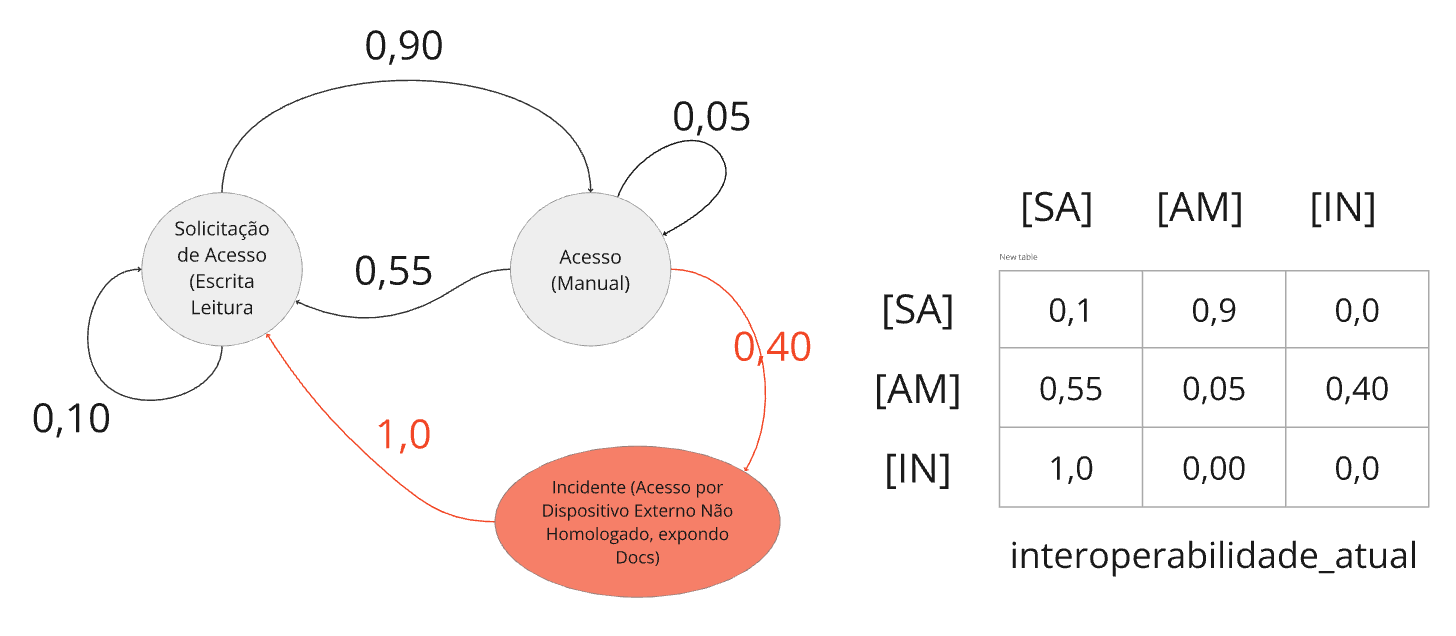

In [ ]:
import numpy as np
import random as rm
import datetime

# The statespace
states = ["SolicitacaoAcesso","AcessoManual","IncidenteAcessoSemConfidencialidade"]



# Possible sequences of events
transitionName = [["SASA", "SAAM", "SAIN"],["AMSA", "AMAM", "AMIN"],["INSA", "INAM", "ININ"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.10, 0.90, 0.00], [0.55, 0.05, 0.40], [1.00, 0.00, 0.00]]

if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
    print("Detectado um erro - talvez na matriz de probabilidades?")
else: print("Tudo certo. Vamos em frente. ", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "!!")

Tudo certo. Vamos em frente.  2024-11-06 17:14:15.694080 !!


In [ ]:
import numpy as np
import random as rm
import datetime
import matplotlib.pyplot as plt

from types import EllipsisType
def activity_forecast(actions):
    # Choose the starting state
    activityAction = "SolicitacaoAcesso"
    activityList = [activityAction]
    i = 0
    prob = 1

    while i != actions:
        #Estado - Solicitação Acesso (["SASA", "SAAM", "SAIN"] => [0.10, 0.90, 0.00])
        #print ("estado = ", activityAction)

        if activityAction == "SolicitacaoAcesso":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SASA":
                prob = prob * 0.10
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "SAAM":
                prob = prob * 0.90
                activityAction = "AcessoManual"
                activityList.append("AcessoManual")
            else:
                prob = prob * 0.0
                activityAction = "IncidenteAcessoSemConfidencialidade"
                activityList.append("IncidenteAcessoSemConfidencialidade")

        #Estado - Acesso Manual (["AMSA", "AMAM", "AMIN"] => [0.80, 0.05, 0.15])
        elif activityAction == "AcessoManual":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "AMSA":
                prob = prob * 0.70
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "AMAM":
                prob = prob * 0.05
                activityAction = "AcessoManual"
                activityList.append("AcessoManual")
            elif change == "AMIN":
                prob = prob * 0.25
                activityAction = "IncidenteAcessoSemConfidencialidade"
                activityList.append("IncidenteAcessoSemConfidencialidade")

        #Estado - IncidenteAcessoSemConfidencialidade (["INSA", "INAM", "ININ"] => [1.00, 0.00, 0.0])
        elif activityAction == "IncidenteAcessoSemConfidencialidade":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "INSA":
                prob = prob * 1.00
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "INAM":
                prob = prob * 0.00
                activityAction = "AcessoManual"
                activityList.append("AcessoManual")
            elif change == "ININ":
                prob = prob * 0.00
                activityAction = "IncidenteAcessoSemConfidencialidade"
                activityList.append("IncidenteAcessoSemConfidencialidade")
        i += 1

    return activityList

# To save every activityList
list_activity = []
countSA = 0
countAM = 0
countIN = 0

#Vetores de probabilidades e eixo X
eixoX = []
probSolicitacaoAcesso = []
probAcessoManual = []
probIncidentesAcessoSemConfidencialidade = []

probSolicitacaoAcesso.append (1.0)
probAcessoManual.append (0.0)
probIncidentesAcessoSemConfidencialidade.append (0.0)

# Experimente Número de dias (Dias estimado/previsao - forecast) e de Acessos (Nactions)
Nactions = 210 # Cada dia dos 180 dias (210 acessos (35 pessoas, 6 acessos))
Ndias = 180  # Estimativa em dias (forecast)
# `Range` starts from the first count up until but excluding the last count

#para cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1
for index in range(1, Nactions):
   eixoX.append(index)

print ("=============================================================================================================================================")
print ()
print (" G4: Simulação com Markov para Sistema Atual - Sem controle automatizado de Confidencialidade  [", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "]")
print ("     >> Simulação quantidade de dias = ", Ndias)
print ("     >> Numero de acessos por dia    = ", Nactions)
print ()
print ()
print ("=============================================================================================================================================")
print ()

list_activity = []
for iteractions in range(1, Nactions):
    list_activity.append(activity_forecast(Ndias)) # Estimar Ndias


    # **** Cálculo do estado estável para este acesso do Nactions e com predição de Ndias forecast()
    #
    # Iterate through the list to get a count of all activities ending in state:'ServicoPrincipal'
    #print (">>", list_activity)
    for smaller_list in list_activity:
        #print ("   +", smaller_list)
        if(smaller_list[2] == "SolicitacaoAcesso"):
            countSA += 1
    #print ("countSA", countSA, totalSimuladoPredicao)



    # Iterate through the list to get a count of all activities ending in state:'AcessoManual'
    for smaller_list in list_activity:
        if(smaller_list[2] == "AcessoManual"):
            countAM += 1
    #print ("countAM", countAM, totalSimuladoPredicao)



    # Iterate through the list to get a count of all activities ending in state:'IncidenteAcessoSemConfidencialidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "IncidenteAcessoSemConfidencialidade"):
            countIN += 1
    #print ("countIN", countIN, totalSimuladoPredicao)
    #print ("Calculando ...", countSA, countAM, countIN)
    totalSimuladoPredicao = countSA + countAM + countIN

    # Calculate the probability of starting from state:'Sleep' and ending at state:'ServicoPrincipal'
    probSolicitacaoAcesso.append((countSA/totalSimuladoPredicao)*100.0)
    #print("1. The probability of starting at state:'SolicitacaoAcesso' and ending at state:'SolicitacaoAcesso'= " + str(probSolicitacaoAcesso[iteracao]) + "%")

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'AcessoManual'
    probAcessoManual.append((countAM/totalSimuladoPredicao)*100.0)
    #print("2. The probability of starting at state:'SolicitacaoAcesso' and ending at state:'AcessoManual'= " + str(probAcessoManual[iteracao]) + "%")


    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'Incidente'
    probIncidentesAcessoSemConfidencialidade.append((countIN/totalSimuladoPredicao)*100.0)
    #print("3. The probability of starting at state:'SolicitacaoAcesso' and ending at state:'IncidenteAcessoSemConfidencialidade'= " + str(probIncidentesAcessoSemConfidencialidade[iteracao]) + "%")

    #
    # **** Fim cálculo  ****

    iteracao +=1


 G4: Simulação com Markov para Sistema Atual - Sem controle automatizado de Confidencialidade  [ 2024-11-06 17:26:25.148435 ]
     >> Simulação quantidade de dias =  180
     >> Numero de acessos por dia    =  210





1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de: 50.53 %
2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoManual" é de: 16.23 %
3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "IncidenteAcessoSemConfidencialidade" é de: 33.24 %


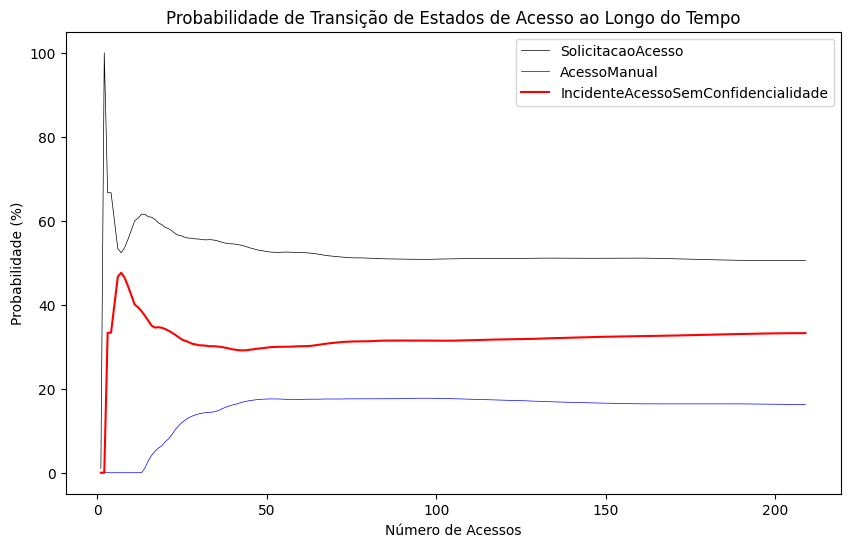

In [ ]:
# Exibindo probabilidades finais
print(f'1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de: {probSolicitacaoAcesso[Nactions-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoManual" é de: {probAcessoManual[Nactions-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "IncidenteAcessoSemConfidencialidade" é de: {probIncidentesAcessoSemConfidencialidade[Nactions-1]:.2f} %')

# Plot do gráfico com título, rótulos e legenda
plt.figure(figsize=(10, 6))
plt.plot(eixoX[:Nactions-1], probSolicitacaoAcesso[:Nactions-1], color='black', linewidth=0.5, label='SolicitacaoAcesso')
plt.plot(eixoX[:Nactions-1], probAcessoManual[:Nactions-1], color='blue', linewidth=0.5, label='AcessoManual')
plt.plot(eixoX[:Nactions-1], probIncidentesAcessoSemConfidencialidade[:Nactions-1], color='red', label='IncidenteAcessoSemConfidencialidade')

# Configurações do gráfico
plt.title("Probabilidade de Transição de Estados de Acesso ao Longo do Tempo")
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()  # Adiciona a legenda
plt.show()

## Análise e conclusão

A simulação, que contabilizou 180 dias e uma média de 210 acessos por dia, revelou que a maior parte dos acessos termina no estado "SolicitacaoAcesso", com uma probabilidade de 51.61%. Isso sugere que, em mais da metade dos casos, os pedidos de acesso ficam em uma etapa inicial, possivelmente devido a atrasos na análise ou na aprovação manual dos acessos, o que impacta diretamente a interoperabilidade do sistema. Essa alta taxa de pendências no estado inicial indica uma falta de fluidez nos processos de controle de acesso e sugere a necessidade de um sistema mais dinâmico ou automatizado para processar essas solicitações com maior eficiência.

A probabilidade de que os acessos terminem no estado "AcessoManual" é de 14.22%, o que evidencia que uma parcela limitada dos acessos é tratada manualmente. Embora isso demonstre algum grau de operabilidade humana no sistema, é uma prática que aumenta o tempo de resposta, afeta a agilidade do processo e pode comprometer a interoperabilidade geral. A dependência desse tipo de intervenção manual sugere um potencial gargalo no fluxo de acesso e uma possível área de melhoria, caso o objetivo seja tornar o sistema mais eficiente e integrado.

No entanto, um ponto crítico revelado pela simulação é a probabilidade de 34.17% de o acesso terminar no estado "IncidenteAcessoSemConfidencialidade". Esse alto índice indica que, em mais de um terço dos casos, ocorrem incidentes onde documentos confidenciais são acessados por dispositivos não autorizados, comprometendo a confidencialidade dos dados. Essa situação reflete uma falha significativa de interoperabilidade no sistema atual, pois permite que informações sensíveis sejam acessadas sem o controle adequado. A ausência de um sistema automatizado de controle de confidencialidade é uma das causas mais prováveis desse problema, mostrando que o sistema, na sua forma atual, não possui uma integração eficaz para barrar o acesso não autorizado.

## Conclusão
A simulação sugere que o sistema atual sofre com limitações de interoperabilidade, evidenciadas pela quantidade de solicitações de acesso que ficam no estado inicial e pelo volume de incidentes de confidencialidade. A dependência de processos manuais aumenta a ineficiência e, ao mesmo tempo, a falta de controle automatizado de confidencialidade compromete a segurança do sistema. Portanto, é recomendável considerar melhorias na automação e controle de acesso para aprimorar tanto a eficiência quanto a segurança da interoperabilidade do sistema.